# Linear Regression in TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn

## Define data

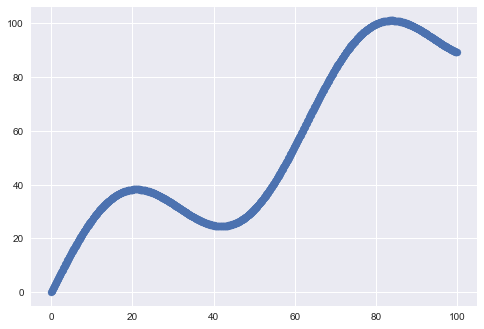

In [2]:
# Define input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

# Plot input data
plt.scatter(X_data, y_data)
plt.show()

In [3]:
# Define data and batch size
n_samples = 1000
batch_size = 100

In [4]:
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))

## TensorFlow Modeling
- Weight, Bias, Cost function, Loss function

In [5]:
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [6]:
# Define variables to be learned
with tf.variable_scope("linear-regression", reuse=False):
    W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)

## Optimizer
- AdamOptimizer: Gradient Descent와 유사하지만 더 효율적으로 수렴

In [7]:
# Sample code to run one step of gradient descent
opt_operation = tf.train.AdamOptimizer().minimize(loss)
loss_vec = []

## Gradient descent loop

In [8]:
with tf.Session() as sess:
    # Initialize variables in graph
    sess.run(tf.global_variables_initializer())
    # Gradient descent loop for 500 steps
    for _ in range(500):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})
        loss_vec.append(loss_val)

## Result

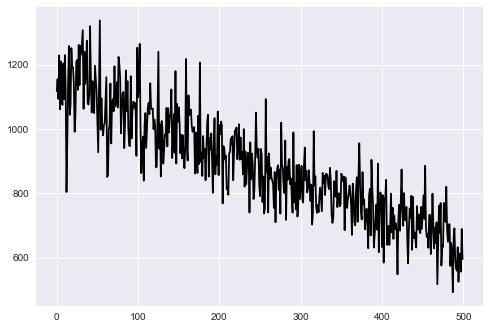

In [9]:
plt.plot(loss_vec, 'k-')
plt.show()